# Pytorch Basics - Regressão Linear

O objetivo desse breve trabalho é apresentar como é realizado um modelo de regressão linear utilizando pytorch. Muitas das vezes utiliza-se regressão linear como uma primeira hipotese, devido a sua simplicidade, antes de partir para modelos mais complexos.

## Carregando as bibliotecas necessárias

In [21]:
#Carregando o Pytorch
import torch

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Carregando o conjunto de dados

Para carregar o bando de dados que está em .csv, utilizamos o pandas, o qual consegue ler um arquivo localmente ou em um nuvem (url deve ser do raw do .csv)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lucastiagooliveira/lucas_repo/master/Kaggle/Revisiting%20a%20Concrete%20Strength%20regression/datasets_31874_41246_Concrete_Data_Yeh.csv')

Mostrando as 5 primeiras linhas do dataframe carregado, isso é importante para verificarmos o se o dataframe está correto.

In [3]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Apresentando um resumo estatístico dos dataframe por coluna, tais como: quantidade de dados, média, desvio padrão, mínimo, primeiro ao terceiro quartil e valor máximo.

In [4]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


## Plotando os gráficos de todas as váriaveis

Para visualização da relação entre as váriaveis é interessante fazer a visualização gráfica da relação entre as variáveis. Para isso usamos a função PairGrid da biblioteca Seaborn aliado com um scatterplot da biblioteca MatplotLib.

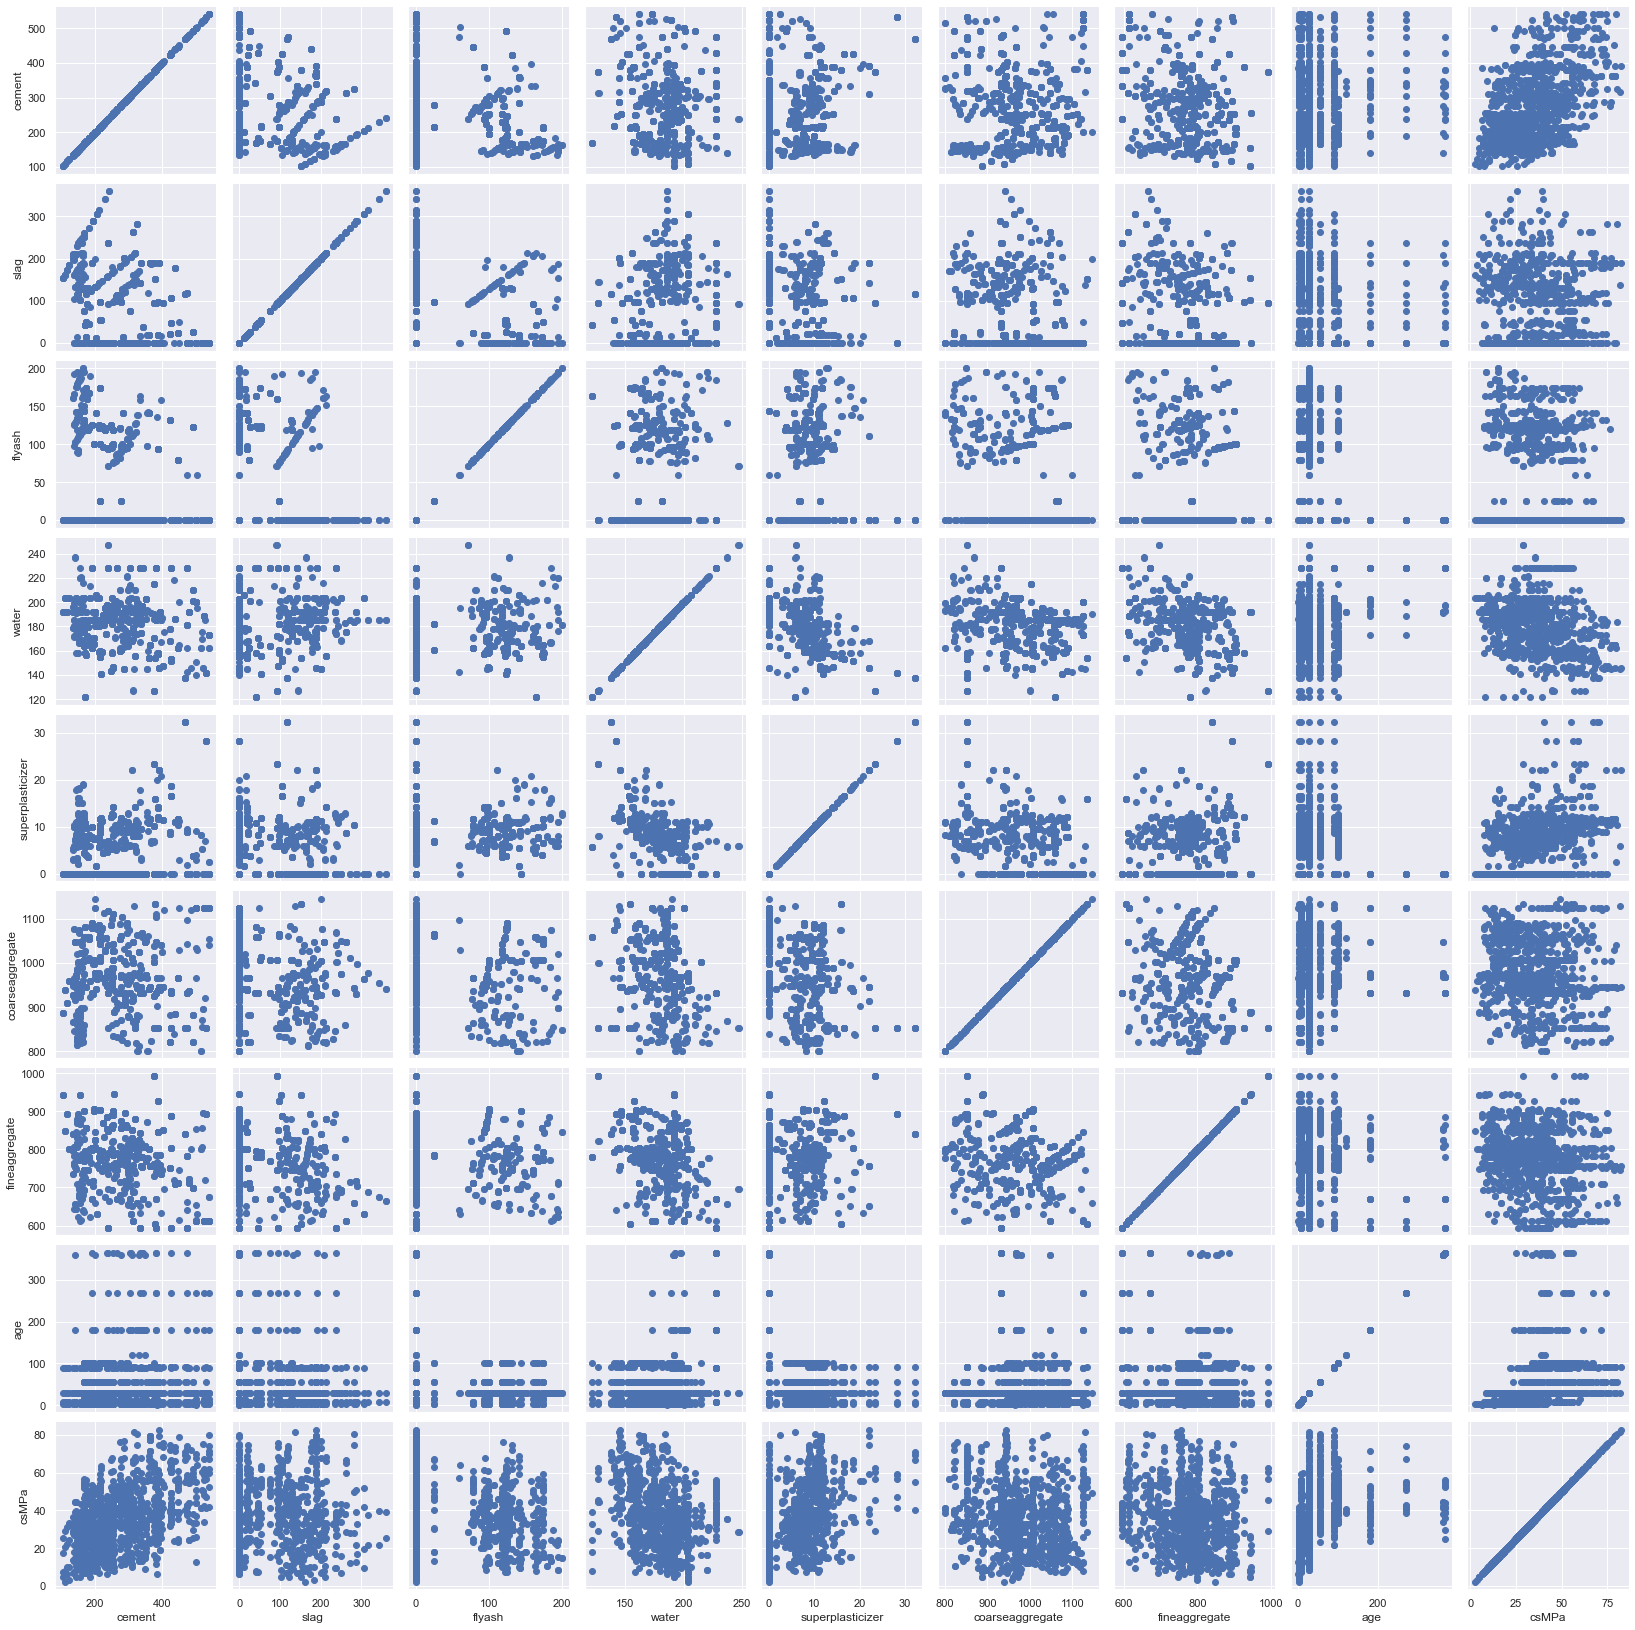

In [5]:
sns.set(style="darkgrid")
g = sns.PairGrid(df)
g.map(plt.scatter)

## Correlação linear 

Para entendimento da correlação linear das variáveis entre si, temos a função "built-in" do Pandas que nos retorna o coeficiente de correlação que tem por padrão o método Pearson.

In [6]:
df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Escolhendo as variáveis que serão utilizadas para criação do modelo.

In [7]:
var_used = ['cement', 'superplasticizer', 'age', 'water']
train = df[var_used]
target = df['csMPa']

Tabela com somente as variáveis que serão utilizadas.

In [8]:
train.head()

,cement,superplasticizer,age,water
0,540.0,2.5,28,162.0
1,540.0,2.5,28,162.0
2,332.5,0.0,270,228.0
3,332.5,0.0,365,228.0
4,198.6,0.0,360,192.0


Para iniciarmos um modelo temos que fazer a transformação da base de dados que está com o tipo de DataFrame para tensor, que é utilizado pelo Pytorch. Todavia, uma das maneiras de fazer essa transformação é antes fazer a transformação da base de dados para um vetor do Numpy e depois transformar para um tensor do Pytorch.

Obs.: Foi criado o vetor de uns para ser adicionado ao tensor dos parâmetros, pois essa coluna deverá multiplicar a constante da expressão (b), conforme o exemplo abaixo.

                                            Y = a*X + b

In [9]:
train = np.asarray(train)
a = np.ones((train.shape[0],1))
train = torch.tensor(np.concatenate((train, a), axis=1))
target = torch.tensor(np.asarray(target))
train.shape

torch.Size([1030, 5])

## Criando o modelo

Para iniciarmos precisamos criar uma função a qual definirá a equação da regressão linear a qual utilizará a função matmul para realizar a multiplicação entre os dois tensores dos parâmetros e variáveis dependentes.

In [10]:
def model(x,params):
    return torch.matmul(x, params)

Função que calcula o erro quadrático médio (MSE).

Para saber mais sobre como é calculado acesso o link: https://pt.qwe.wiki/wiki/Mean_squared_error

In [11]:
def mse(pred, labels): return ((pred - labels)**2).mean()

Para iniciar o treino do modelo primeiramente temos que criar um tensor o qual receberá os valores dos parâmetros que serão atualizados a cada iteração, quedo assim precisamos utilizar o método requires_grad_ assim será possível calcular o gradiente desse tensor quando necessário.

Observe que o tipo do objeto criado é torch.float64.

In [12]:
params = torch.randn(5,1, dtype=torch.float64).requires_grad_()
params.dtype

torch.float64

**Primeiro passo:** realizar as predições do modelo

In [13]:
pred = model(train, params)

**Segundo passo:** calcular como o nosso modelo performou, ou seja, calcular MSE para averiguação da performace do modelo.

Observe que o modelo vai apresentar um erro acentuado, pois os parâmetros ainda não foram *treinados*.

In [14]:
loss = mse(pred, target)
loss

tensor(4826.8560, dtype=torch.float64, grad_fn=<MeanBackward0>)

**Terceiro passo:** realizar o gradiente descente.

Conceito do algoritmo de gradiente descendente: http://cursos.leg.ufpr.br/ML4all/apoio/Gradiente.html

In [15]:
loss.backward()
params.grad

tensor([[ 4674.1422],
        [  169.6877],
        [-7388.6451],
        [ 3269.3217],
        [   19.6690]], dtype=torch.float64)

**Quarto passo:** Atualização dos parâmetros, para isso utiliza-se o valor do gradiente por meio do algoritmo descendente e é escalado (multiplicado) pelo taxa de aprendizado (*learning rate*). 

Após a realização da atulização dos parâmetros deve-se resetar o gradiente.

In [16]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

Primeira iteração realizada, pode-se observar o valor do erro do nosso modelo reduziu. A tendência é ocorrer uma diminuição até a cada iteração, até a estabilização do modelo.

In [17]:
pred = model(train, params)
loss = mse(pred, target)
loss

tensor(4242.2577, dtype=torch.float64, grad_fn=<MeanBackward0>)

Foi criada uma função que realiza todos os passos acima realizados.

In [18]:
def step(train, target, params, lr = 1e-6):
    ## realizando as predições
    pred = model(train, params)
    
    ## caculando o erro
    loss = mse(pred, target)
    
    ## realizando o gradiente descendente
    loss.backward()
    
    ## atualizando os parâmtros
    params.data -= lr * params.grad.data
    
    ## reset do gradiente
    params.grad = None
    
    ## imprimindo na tela o erro
    print('Loss:',loss.item())
    
    ## retornado as predições e os parâmetros atuzalizados na ultima iteração
    return pred, params    

Criando um loop para realizar as itereções, é possível verificar a diminuição do erro a cada iteração, ou seja, se realizada mais iteração pode-se chegar a um resultado plausível (neste caso não cheramos a um, pois o modelo de regressão linear não é um modelo adequado para esses dados, somente como hipótese inicial).

In [19]:
for i in range(10): loss, params = step(train, target, params)

Loss: 4242.257680475658
Loss: 4147.213642508007
Loss: 4069.8103849910617
Loss: 4002.831926761954
Loss: 3942.1511473935216
Loss: 3885.405335131498
Loss: 3831.2396737957183
Loss: 3778.8751298582406
Loss: 3727.8616331660246
Loss: 3677.9370952686463


Esté é o resultado dos parâmetros que serão utilizados para o modelo realizar futuras predições.

In [20]:
parameters = params
parameters #parametros do modelo

tensor([[-0.0047],
        [-0.4354],
        [-0.9488],
        [ 0.4712],
        [ 0.3103]], dtype=torch.float64, requires_grad=True)